# Import

In [ ]:
from mne.io.snirf import read_raw_snirf
from get_events_from_snirf import get_events_from_snirf
from matplotlib import pyplot as plt
import numpy as np

# Load File

In [ ]:
path = '../data_hojjat/dec_nef/1_new_full/test_001_S001_232eefe_3.snirf'

In [ ]:
snirf = read_raw_snirf(path)
snirf

In [ ]:
snirf.plot(n_channels=30, duration=300, show_scrollbars=False)

In [ ]:
import statsmodels.api as sm

In [ ]:
data = sm.datasets.scotland.load()

In [ ]:
import statsmodels.api as sm

In [ ]:
data = sm.datasets.scotland.load()

In [ ]:
data.exog = sm.add_constant(data.exog)

In [ ]:
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

In [ ]:
gamma_results = gamma_model.fit()

In [ ]:
print(gamma_results.summary())

# MNE

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import mne
import mne_nirs

from mne_nirs.experimental_design import make_first_level_design_matrix
from mne_nirs.statistics import run_glm
from mne_nirs.channels import (get_long_channels,
                              get_short_channels,
                              picks_pair_to_idx)

from nilearn.plotting import plot_design_matrix

In [3]:
path = '../data_hojjat/finger_tap/40.snirf'

In [4]:
raw = mne.io.read_raw_snirf(path)

Loading /home/kernel/Desktop/py_test/project/kernel_stuff/../data_hojjat/finger_tap/40.snirf


In [5]:
raw.annotations.set_durations(12)

<Annotations | 1123 segments: StartBlock (40), StartExperiment (1), ...>

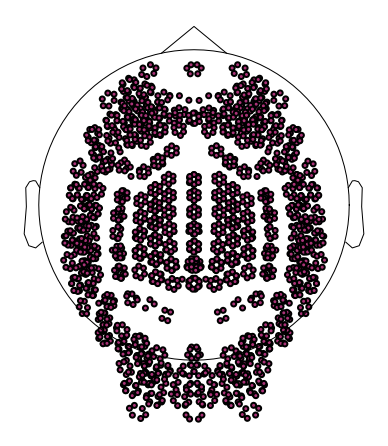

In [6]:
raw.plot_sensors();

In [ ]:
# %matplotlib qt

# fig = mne.viz.create_3d_figure(size=(800, 600), bgcolor='white')

# fig = mne.viz.plot_alignment(raw.info, show_axes=True,
#                             subject='fsaverage', coord_frame='mri',
#                             trans='fsaverage', surfaces=['brain'],
#                             fnirs=['channels', 'pairs',
#                                   'sources', 'detectors'],
#                             subjects_dir=path, fig=fig)

In [ ]:
%matplotlib inline

In [7]:
print(raw.annotations)

<Annotations | 1123 segments: StartBlock (40), StartExperiment (1), ...>


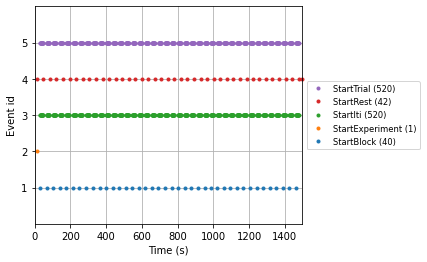

In [8]:
events, event_dict = mne.events_from_annotations(raw, verbose=False)
mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq']);

Used Annotations descriptions: ['StartBlock', 'StartExperiment', 'StartIti', 'StartRest', 'StartTrial']


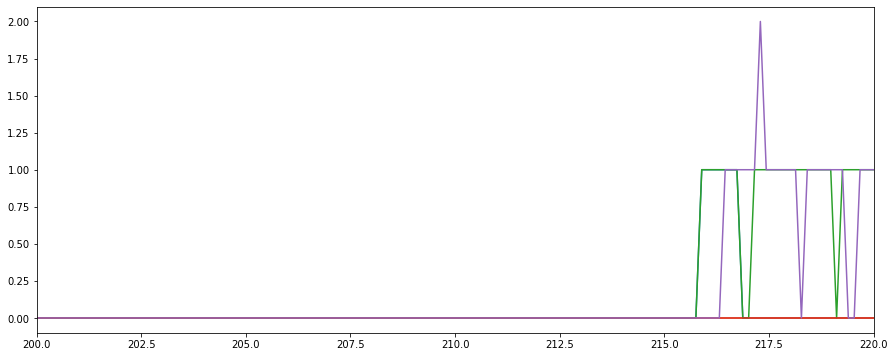

In [11]:
s = mne_nirs.experimental_design.create_boxcar(raw)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plt.plot(raw.times, s, axes=axes)
# plt.legend()

plt.xlim(200, 220)
plt.show()

In [12]:
short_chs = get_short_channels(raw)
raw = get_long_channels(raw);

Reading 0 ... 10738  =      0.000 ...  1504.394 secs...
Reading 0 ... 10738  =      0.000 ...  1504.394 secs...


In [15]:
design_matrix = make_first_level_design_matrix(raw,
                                              hrf_model='spm',
                                              stim_dur=12.0,
                                              drift_order=3,
                                              drift_model='polynomial')

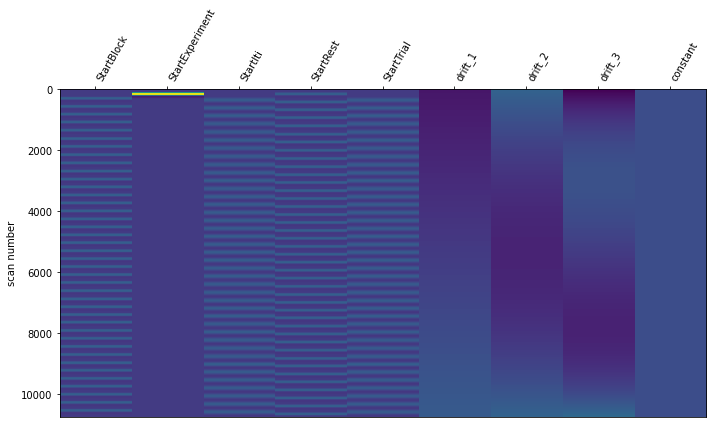

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
fig = plot_design_matrix(design_matrix, ax=ax1);

In [17]:
design_matrix['ShortHbO'] = np.mean(short_chs.copy().pick(picks='hbo').get_data(), axis=0)

design_matrix['ShortHbR'] = np.mean(short_chs.copy().pick(picks='hbr').get_data(), axis=0)

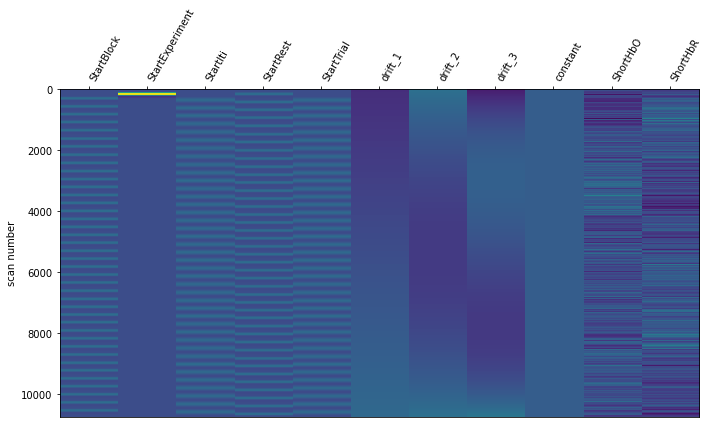

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
fig = plot_design_matrix(design_matrix, ax=ax1);

In [19]:
design_matrix['MagicRegressor'] = np.random.rand(raw.get_data(1).shape[1], 1)

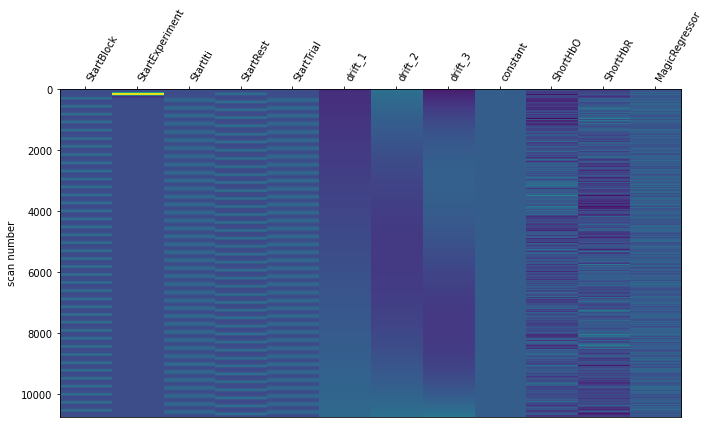

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
fig = plot_design_matrix(design_matrix, ax=ax1);

In [24]:
event_dict

{'StartBlock': 1,
 'StartExperiment': 2,
 'StartIti': 3,
 'StartRest': 4,
 'StartTrial': 5}

Used Annotations descriptions: ['StartBlock', 'StartExperiment', 'StartIti', 'StartRest', 'StartTrial']


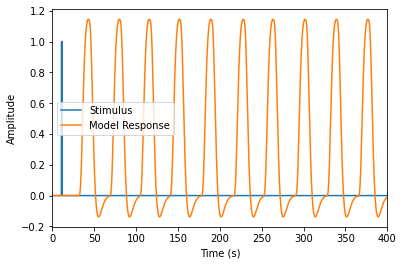

In [30]:
s = mne_nirs.experimental_design.create_boxcar(raw)
plt.plot(raw.times, s[:, 1])

plt.plot(design_matrix['StartBlock'])

plt.xlim(0, 400)
plt.legend(['Stimulus', 'Model Response'])
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.show()

In [31]:
data_subset = raw.copy().pick(picks=range(2));

In [32]:
glm_est = run_glm(data_subset, design_matrix, noise_model='ar4')

In [33]:
glm_est

GLM Results for 2 channels

In [34]:
glm_est.ch_names

['S1_D13 hbo', 'S1_D13 hbr']

In [35]:
glm_est.copy().pick('hbo')

GLM Results for 1 channels

In [36]:
glm_est.data['S1_D13 hbo'].model.order

4

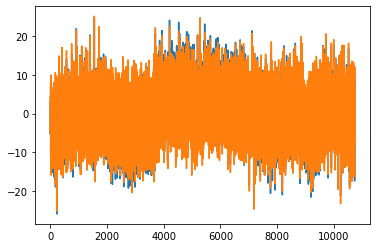

In [37]:
plt.plot(glm_est.data['S1_D13 hbo'].Y)
plt.plot(glm_est.data['S1_D13 hbo'].whitened_Y)

In [38]:
glm_est.to_dataframe()

variable,Condition,df,mse,p_value,se,t,theta,Source,Detector,Chroma,Significant,ch_name
0,MagicRegressor,12.0,39.102566,7.056068e-01,0.205694,-0.386896,-0.079582,1,13,hbo,False,S1_D13 hbo
1,ShortHbO,12.0,39.102566,3.762510e-02,1.423030,-2.336483,-3.324886,1,13,hbo,True,S1_D13 hbo
2,ShortHbR,12.0,39.102566,2.283125e-02,1.165638,-2.609296,-3.041494,1,13,hbo,True,S1_D13 hbo
3,StartBlock,12.0,39.102566,8.599232e-01,1.039590,0.180304,0.187442,1,13,hbo,False,S1_D13 hbo
4,StartExperiment,12.0,39.102566,6.509184e-01,1.448956,-0.464048,-0.672386,1,13,hbo,False,S1_D13 hbo
5,StartIti,12.0,39.102566,9.347130e-01,2.380606,-0.083651,-0.199141,1,13,hbo,False,S1_D13 hbo
6,StartRest,12.0,39.102566,9.092995e-01,0.917091,-0.116350,-0.106704,1,13,hbo,False,S1_D13 hbo
7,StartTrial,12.0,39.102566,9.406919e-01,2.362916,0.075974,0.179520,1,13,hbo,False,S1_D13 hbo
8,constant,12.0,39.102566,6.604018e-01,0.228130,0.450471,0.102766,1,13,hbo,False,S1_D13 hbo
9,drift_1,12.0,39.102566,3.243763e-03,0.350511,3.663766,1.284189,1,13,hbo,True,S1_D13 hbo


<AxesSubplot:xlabel='Condition', ylabel='Theta'>

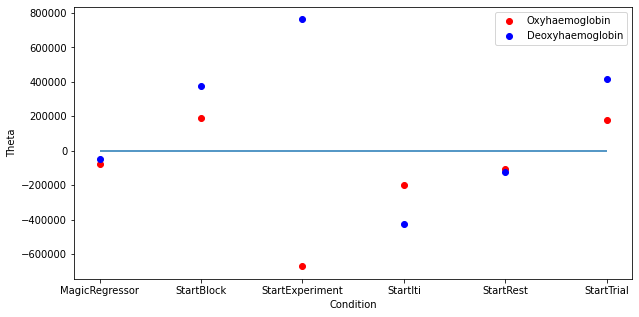

In [39]:
glm_est.scatter()

In [40]:
glm_est= run_glm(raw, design_matrix)

In [ ]:
glm_est

In [ ]:
glm_est.copy().pick(picks="S21")

<Figure size 1080x432 with 0 Axes>

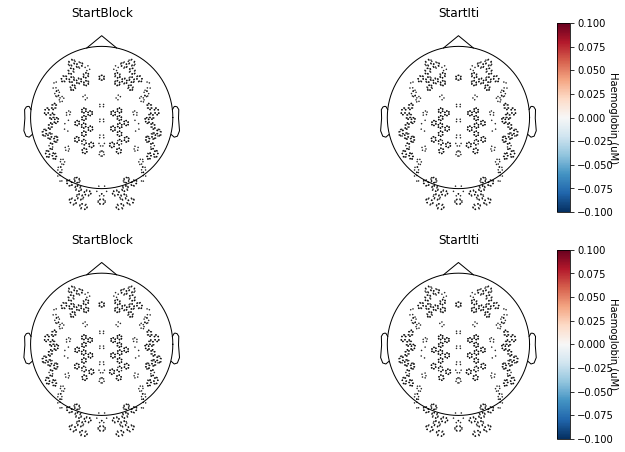

In [42]:
plt.figure(figsize=(15, 6))
glm_est.plot_topo(conditions=['StartIti', 'StartBlock']);

In [43]:
df = glm_est.to_dataframe()

In [54]:
names = df[(df['Condition'] == 'StartBlock') & (df['Significant'] == True)].ch_name.values

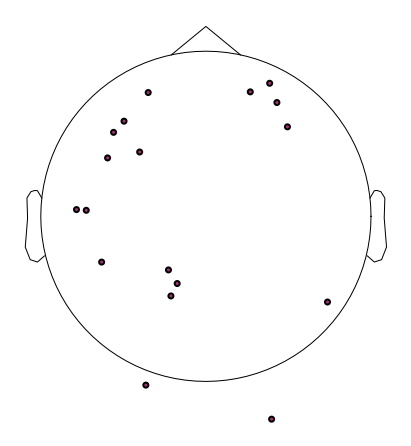

In [57]:
raw.copy().pick(picks=names.astype(str)).plot_sensors();